# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import seaborn as sb

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/city_data_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lon = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lon = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lons = zip(lat, lon)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [7]:
# Finding the cities nearest to the coordinates
coordinates = []
for x in range(0,len(lat)):
    coordinates.append((lat[x], lon[x]))

In [9]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

#  df
city_data_df = pd.DataFrame(cities)
city_data_df["City Name"] = ""
city_data_df["Country Code"] = ""

for index, row in city_data_df.iterrows():
    row["City Name"] = city_data_df.iloc[index,0].city_name
    row["Country Code"] = city_data_df.iloc[index,0].country_code

#  dropna
city_data_df.drop_duplicates(['City Name', 'Country Code'], inplace=True)
city_data_df.reset_index(inplace=True)

 
del city_data_df[0]
del city_data_df['index']

city_data_df.head()

,City Name,Country Code
0,inta,ru
1,chokurdakh,ru
2,caluquembe,ao
3,rikitea,pf
4,bolungarvik,is


In [10]:

city_data_df['Latitude'] = ""
city_data_df['Longitude'] = ""
city_data_df['Temperature (F)'] = ""
city_data_df['Humidity (%)'] = ""
city_data_df['Cloudiness (%)'] = ""
city_data_df['Wind Speed (mph)'] = ""

city_data_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,inta,ru,,,,,,
1,chokurdakh,ru,,,,,,
2,caluquembe,ao,,,,,,
3,rikitea,pf,,,,,,
4,bolungarvik,is,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
print("Beginning Data Retrieval")
print("---------------------------------")

start_time = time.time()

for index, row in city_data_df.iterrows():
    # Building target url
    url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], row['Country Code'], api_key)
   
    print("Now retrieving City #" + str(index) + ": " + row['City Name'] + ", " + row['Country Code'])
    print(url)
    
    weather_data = requests.get(url).json()
    
    try:
        row['Latitude'] = weather_data['coord']['lat']
        row['Longitude'] = weather_data['coord']['lon']
    
        row['Temperature (F)'] = weather_data['main']['temp']
    
        row['Humidity (%)'] = weather_data['main']['humidity']
    
        row['Cloudiness (%)'] = weather_data['clouds']['all']
    
        row['Wind Speed (mph)'] = weather_data['wind']['speed']
    except:
        print("Error.... Skipping")
        continue
        
    # Pausing to limit pull requests
    if (index + 1) % 60 == 0:
        run_time = time.time() - start_time
        time.sleep(60 - run_time)
        start_time = time.time()
    
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")


columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    city_data_df[column] = pd.to_numeric(city_data_df[column], errors='coerce')
    

city_data_df.dropna(inplace=True)

city_data_df.head()

Beginning Data Retrieval
---------------------------------
Now retrieving City #0: inta, ru
http://api.openweathermap.org/data/2.5/weather?q=inta,ru&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #1: chokurdakh, ru
http://api.openweathermap.org/data/2.5/weather?q=chokurdakh,ru&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #2: caluquembe, ao
http://api.openweathermap.org/data/2.5/weather?q=caluquembe,ao&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #3: rikitea, pf
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #4: bolungarvik, is
http://api.openweathermap.org/data/2.5/weather?q=bolungarvik,is&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #5: kapaa, us
http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrievi

Now retrieving City #54: tiznit, ma
http://api.openweathermap.org/data/2.5/weather?q=tiznit,ma&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #55: jamestown, sh
http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #56: winsum, nl
http://api.openweathermap.org/data/2.5/weather?q=winsum,nl&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #57: mataura, pf
http://api.openweathermap.org/data/2.5/weather?q=mataura,pf&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #58: provideniya, ru
http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #59: karratha, au
http://api.openweathermap.org/data/2.5/weather?q=karratha,au&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #60: hermanus, za
http://api.openweathermap.o

Now retrieving City #107: boueni, yt
http://api.openweathermap.org/data/2.5/weather?q=boueni,yt&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #108: afua, br
http://api.openweathermap.org/data/2.5/weather?q=afua,br&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #109: new norfolk, au
http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #110: korla, cn
http://api.openweathermap.org/data/2.5/weather?q=korla,cn&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #111: hilo, us
http://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #112: yei, sd
http://api.openweathermap.org/data/2.5/weather?q=yei,sd&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #113: sfantu gheorghe, ro
http://api.openweathermap.org/data/2.5/we

Now retrieving City #160: carnarvon, au
http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #161: zapolyarnyy, ru
http://api.openweathermap.org/data/2.5/weather?q=zapolyarnyy,ru&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #162: zhanatas, kz
http://api.openweathermap.org/data/2.5/weather?q=zhanatas,kz&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #163: nelson bay, au
http://api.openweathermap.org/data/2.5/weather?q=nelson bay,au&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #164: aflu, dz
http://api.openweathermap.org/data/2.5/weather?q=aflu,dz&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #165: alice, us
http://api.openweathermap.org/data/2.5/weather?q=alice,us&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #166: katangli, ru
h

Now retrieving City #212: itarema, br
http://api.openweathermap.org/data/2.5/weather?q=itarema,br&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #213: los llanos de aridane, es
http://api.openweathermap.org/data/2.5/weather?q=los llanos de aridane,es&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #214: bilibino, ru
http://api.openweathermap.org/data/2.5/weather?q=bilibino,ru&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #215: husavik, is
http://api.openweathermap.org/data/2.5/weather?q=husavik,is&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #216: kalemie, cd
http://api.openweathermap.org/data/2.5/weather?q=kalemie,cd&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #217: antofagasta, cl
http://api.openweathermap.org/data/2.5/weather?q=antofagasta,cl&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #218: palmer, us
http://api.op

Now retrieving City #265: chuy, uy
http://api.openweathermap.org/data/2.5/weather?q=chuy,uy&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #266: dubai, ae
http://api.openweathermap.org/data/2.5/weather?q=dubai,ae&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #267: mount isa, au
http://api.openweathermap.org/data/2.5/weather?q=mount isa,au&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #268: tabulbah, tn
http://api.openweathermap.org/data/2.5/weather?q=tabulbah,tn&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #269: cidreira, br
http://api.openweathermap.org/data/2.5/weather?q=cidreira,br&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #270: khani, ru
http://api.openweathermap.org/data/2.5/weather?q=khani,ru&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #271: ponta do sol, cv
http://api.op

Now retrieving City #318: barentsburg, sj
http://api.openweathermap.org/data/2.5/weather?q=barentsburg,sj&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #319: yecapixtla, mx
http://api.openweathermap.org/data/2.5/weather?q=yecapixtla,mx&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #320: mount gambier, au
http://api.openweathermap.org/data/2.5/weather?q=mount gambier,au&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #321: beringovskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=beringovskiy,ru&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #322: kabo, cf
http://api.openweathermap.org/data/2.5/weather?q=kabo,cf&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #323: upata, ve
http://api.openweathermap.org/data/2.5/weather?q=upata,ve&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #324: saint-francois, g

Error.... Skipping
Now retrieving City #371: smithers, ca
http://api.openweathermap.org/data/2.5/weather?q=smithers,ca&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #372: menongue, ao
http://api.openweathermap.org/data/2.5/weather?q=menongue,ao&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #373: kiomboi, tz
http://api.openweathermap.org/data/2.5/weather?q=kiomboi,tz&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #374: ahipara, nz
http://api.openweathermap.org/data/2.5/weather?q=ahipara,nz&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #375: bulungu, cd
http://api.openweathermap.org/data/2.5/weather?q=bulungu,cd&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #376: kuytun, cn
http://api.openweathermap.org/data/2.5/weather?q=kuytun,cn&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #377: koumac, nc
http://api.

Now retrieving City #423: bandarbeyla, so
http://api.openweathermap.org/data/2.5/weather?q=bandarbeyla,so&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #424: mbuguni, tz
http://api.openweathermap.org/data/2.5/weather?q=mbuguni,tz&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #425: skibbereen, ie
http://api.openweathermap.org/data/2.5/weather?q=skibbereen,ie&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #426: bose, cn
http://api.openweathermap.org/data/2.5/weather?q=bose,cn&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #427: haines junction, ca
http://api.openweathermap.org/data/2.5/weather?q=haines junction,ca&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #428: nome, us
http://api.openweathermap.org/data/2.5/weather?q=nome,us&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #429: svecha, ru
http://api.ope

Now retrieving City #476: shakawe, bw
http://api.openweathermap.org/data/2.5/weather?q=shakawe,bw&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #477: hongjiang, cn
http://api.openweathermap.org/data/2.5/weather?q=hongjiang,cn&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #478: hounde, bf
http://api.openweathermap.org/data/2.5/weather?q=hounde,bf&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #479: kang, bw
http://api.openweathermap.org/data/2.5/weather?q=kang,bw&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #480: ninghai, cn
http://api.openweathermap.org/data/2.5/weather?q=ninghai,cn&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #481: kaspican, bg
http://api.openweathermap.org/data/2.5/weather?q=kaspican,bg&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #482: esperance, au
http://api.openweathermap.org/d

Now retrieving City #529: guiong, ph
http://api.openweathermap.org/data/2.5/weather?q=guiong,ph&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #530: momcilgrad, bg
http://api.openweathermap.org/data/2.5/weather?q=momcilgrad,bg&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #531: biltine, td
http://api.openweathermap.org/data/2.5/weather?q=biltine,td&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #532: kamenskoye, ru
http://api.openweathermap.org/data/2.5/weather?q=kamenskoye,ru&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #533: severobaykalsk, ru
http://api.openweathermap.org/data/2.5/weather?q=severobaykalsk,ru&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #534: mandalgovi, mn
http://api.openweathermap.org/data/2.5/weather?q=mandalgovi,mn&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City 

Now retrieving City #582: laguna, br
http://api.openweathermap.org/data/2.5/weather?q=laguna,br&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Error.... Skipping
Now retrieving City #583: broome, au
http://api.openweathermap.org/data/2.5/weather?q=broome,au&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #584: buraydah, sa
http://api.openweathermap.org/data/2.5/weather?q=buraydah,sa&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #585: senanga, zm
http://api.openweathermap.org/data/2.5/weather?q=senanga,zm&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #586: divo, ci
http://api.openweathermap.org/data/2.5/weather?q=divo,ci&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #587: pandan, ph
http://api.openweathermap.org/data/2.5/weather?q=pandan,ph&units=imperial&appid=c3602ddb363f2e8795e8276fa97d5516
Now retrieving City #588: humboldt, ca
http://api.openweathermap.org/data/2.5/w

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,inta,ru,66.04,60.13,45.19,82.0,64.0,8.43
1,chokurdakh,ru,70.62,147.9,32.05,92.0,80.0,12.80
2,caluquembe,ao,-13.78,14.68,85.60,26.0,0.0,1.72
3,rikitea,pf,-23.12,-134.97,70.75,100.0,56.0,12.24
5,kapaa,us,22.08,-159.32,76.50,84.0,75.0,3.36


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
city_data_df.to_csv("Output/city_data_df.csv")

In [17]:
city_data_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,inta,ru,66.04,60.13,45.19,82.0,64.0,8.43
1,chokurdakh,ru,70.62,147.9,32.05,92.0,80.0,12.80
2,caluquembe,ao,-13.78,14.68,85.60,26.0,0.0,1.72
3,rikitea,pf,-23.12,-134.97,70.75,100.0,56.0,12.24
5,kapaa,us,22.08,-159.32,76.50,84.0,75.0,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

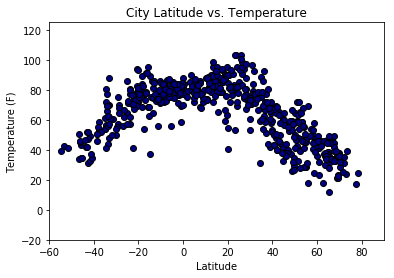

In [18]:
x_axis = city_data_df['Latitude']
y_axis = city_data_df['Temperature (F)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black')

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Temperature (F)")
plt.ylim(-20,125)

plt.savefig("Output/LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

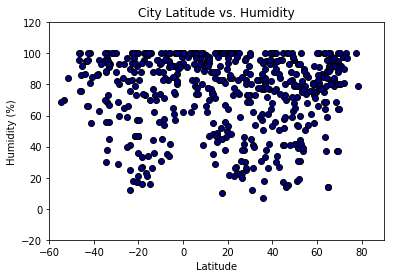

In [20]:
x_axis = city_data_df['Latitude']
y_axis = city_data_df['Humidity (%)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Humidity (%)")
plt.ylim(-20,120)

plt.savefig("Output/LatVsHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

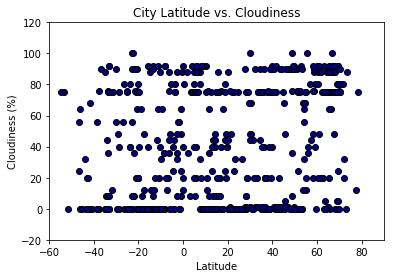

In [21]:
x_axis = city_data_df['Latitude']
y_axis = city_data_df['Cloudiness (%)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Cloudiness (%)")
plt.ylim(-20,120)

plt.savefig("Output/LatVsCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

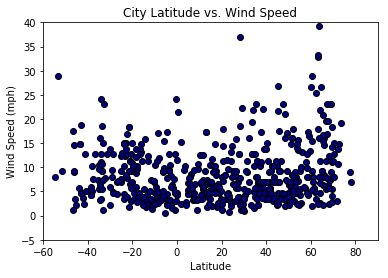

In [22]:
x_axis = city_data_df['Latitude']
y_axis = city_data_df['Wind Speed (mph)']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,40)

plt.savefig("Output/LatVsWindSpd.png")
plt.show()